In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
data = pd.read_csv('athlete_events.csv')    
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data['Sport'] = data['Sport'].astype('category')
print(data.dtypes)

ID           int64
Name        object
Sex         object
Age        float64
Height     float64
Weight     float64
Team        object
NOC         object
Games       object
Year         int64
Season      object
City        object
Sport     category
Event       object
Medal       object
dtype: object


## Finding the sport with the most number of participants throughout the years

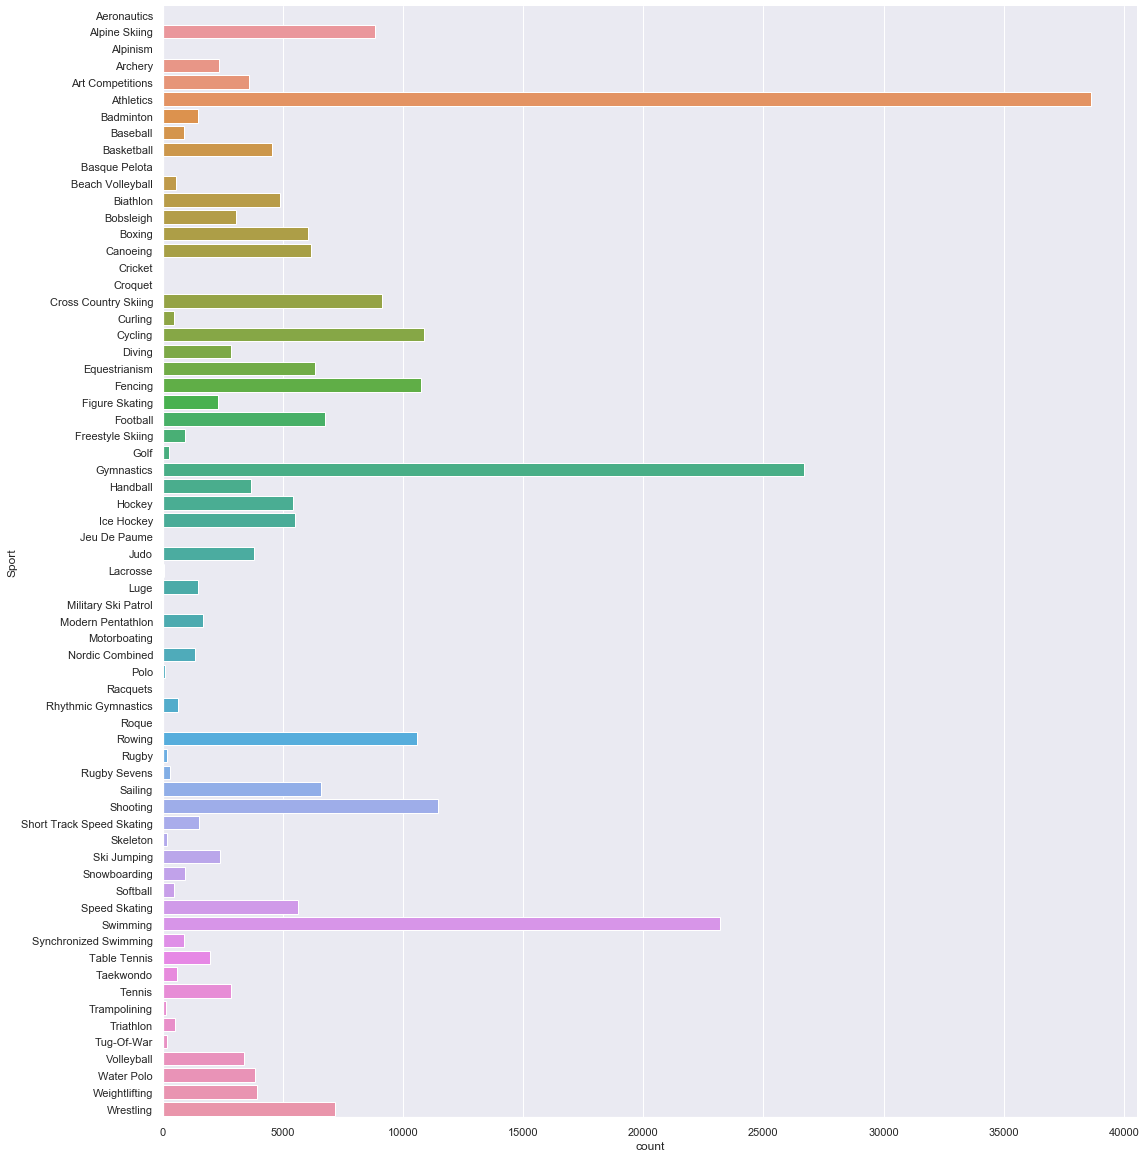

In [5]:
sb.catplot(y = 'Sport', data = data, kind = "count", height = 16)

In [6]:
athletics_data = data[data["Sport"] == "Athletics"]
print("Number of Athletics :", len(athletics_data))

Number of Athletics : 38624


### Categorizing the type of medalists and exploring the data

In [11]:
gold_athletics = athletics_data[athletics_data["Medal"] == "Gold"]
print("Number of Athletics with gold medals :", len(gold_athletics))
silver_athletics = athletics_data[athletics_data["Medal"] == "Silver"]
print("Number of Athletics with Silver medals :", len(silver_athletics))
bronze_athletics = athletics_data[athletics_data["Medal"] == "Bronze"]
print("Number of Athletics with Bronze medals :", len(bronze_athletics))

Number of Athletics with gold medals : 1339
Number of Athletics with Silver medals : 1334
Number of Athletics with Bronze medals : 1296


In [12]:
gold_athletics[['Age','Height','Weight']].describe().round(2)

,Age,Height,Weight
count,1339.00,1296.00,1292.00
mean,25.00,177.91,71.79
std,3.94,9.19,15.71
min,15.00,150.00,40.00
25%,22.00,171.00,60.00
50%,24.00,178.00,70.00
75%,28.00,185.00,79.00
max,41.00,207.00,142.00


In [13]:
silver_athletics[['Age','Height','Weight']].describe().round(2)

,Age,Height,Weight
count,1320.00,1206.0,1199.00
mean,25.09,177.5,71.44
std,4.08,9.0,16.05
min,16.00,152.0,40.00
25%,22.00,170.0,60.00
50%,25.00,178.0,69.00
75%,27.00,184.0,79.00
max,48.00,204.0,154.00


In [14]:
bronze_athletics[['Age','Height','Weight']].describe().round(2)

,Age,Height,Weight
count,1286.00,1168.00,1163.00
mean,24.97,177.43,71.26
std,4.05,9.11,15.57
min,16.00,150.00,40.00
25%,22.00,171.00,61.00
50%,24.00,177.00,68.00
75%,27.00,184.00,78.00
max,48.00,207.00,147.00


### The number of female medalists for each type of medal is around half as much as the male medalists

(array([0, 1]), <a list of 2 Text xticklabel objects>)

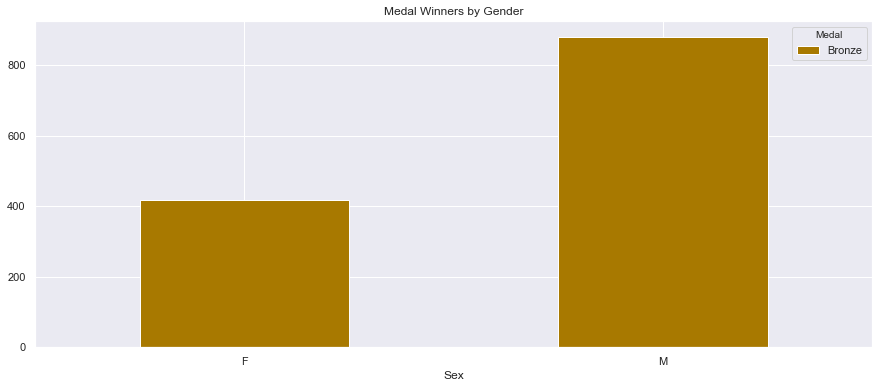

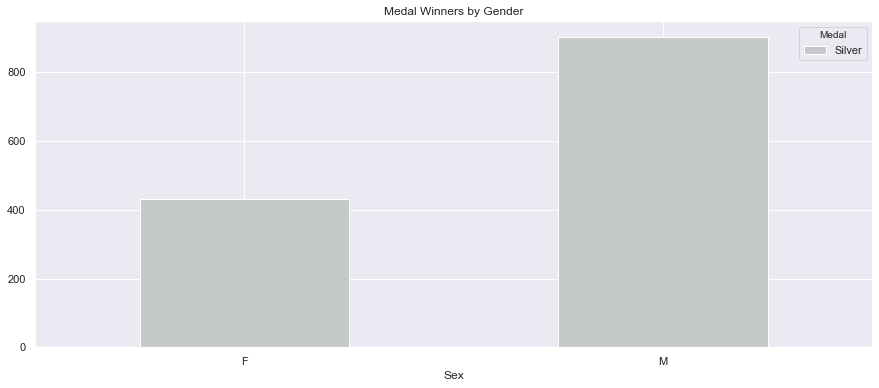

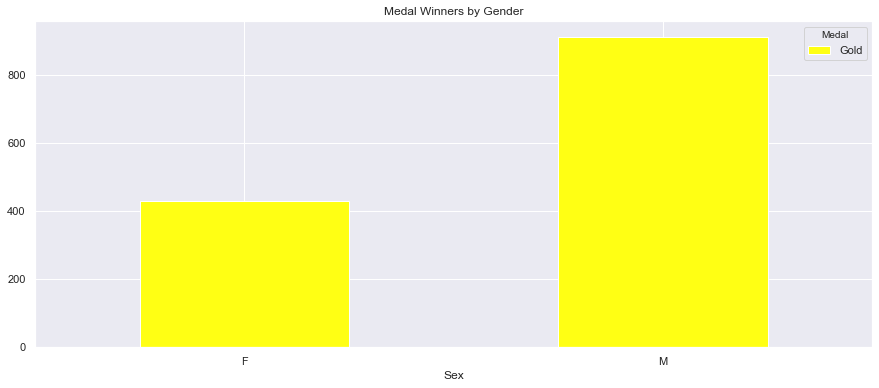

In [15]:
(bronze_athletics.groupby(["Sex","Medal"])["Medal"].count().unstack())[['Bronze']].plot(kind='bar',color='xkcd:bronze',figsize=(15,6))
plt.title('Medal Winners by Gender')
plt.xticks(rotation=0)
(silver_athletics.groupby(["Sex","Medal"])["Medal"].count().unstack())[['Silver']].plot(kind='bar',color='xkcd:silver',figsize=(15,6))
plt.title('Medal Winners by Gender')
plt.xticks(rotation=0)
(gold_athletics.groupby(["Sex","Medal"])["Medal"].count().unstack())[['Gold']].plot(kind='bar',color='xkcd:yellow',figsize=(15,6))
plt.title('Medal Winners by Gender')
plt.xticks(rotation=0)

### Comparing medal winners by their Height, Weight and Age

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

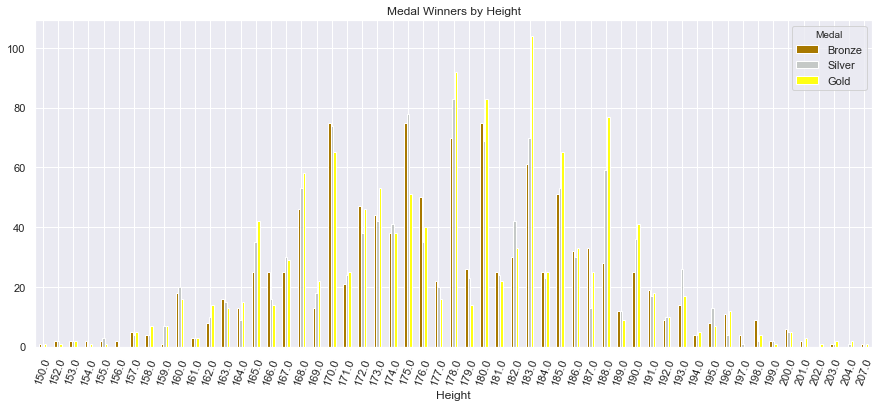

In [18]:
colors = ['xkcd:bronze',  'xkcd:silver','xkcd:yellow']
(athletics_data.groupby(["Height","Medal"])["Medal"].count().unstack())[['Bronze','Silver','Gold']].plot(kind='bar',color=colors,figsize=(15,6))
plt.title('Medal Winners by Height')
plt.xticks(rotation=70)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 <a list of 102 Text xticklabel objects>)

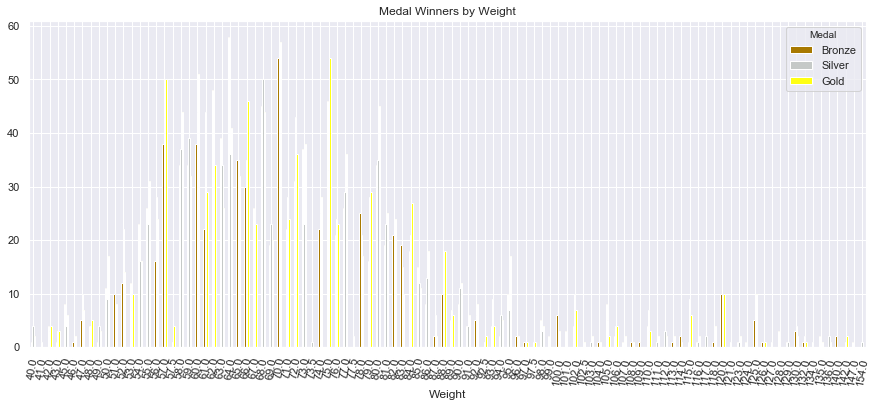

In [19]:
(athletics_data.groupby(["Weight","Medal"])["Medal"].count().unstack())[['Bronze','Silver','Gold']].plot(kind='bar',color=colors,figsize=(15,6))
plt.title('Medal Winners by Weight')
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

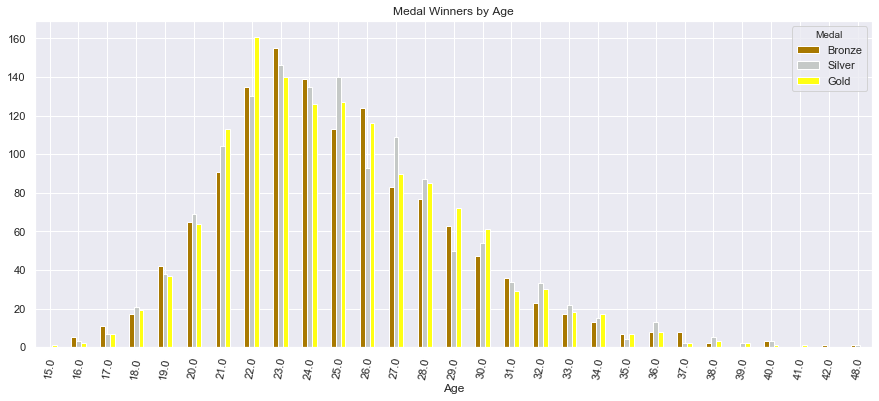

In [20]:
(athletics_data.groupby(["Age","Medal"])["Medal"].count().unstack())[['Bronze','Silver','Gold']].plot(kind='bar',color=colors,figsize=(15,6))
plt.title('Medal Winners by Age')
plt.xticks(rotation=80)

### Group Athletics data into 2 groups; Medalist and Non-medalist


In [21]:
medals = pd.DataFrame(athletics_data)
medalOverYears = medals.copy()
medalOverYears['Medal'].fillna(value='No Medal',inplace=True)
medalOverYears['Medal'].replace(['Gold','Silver','Bronze'],'Medalist',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

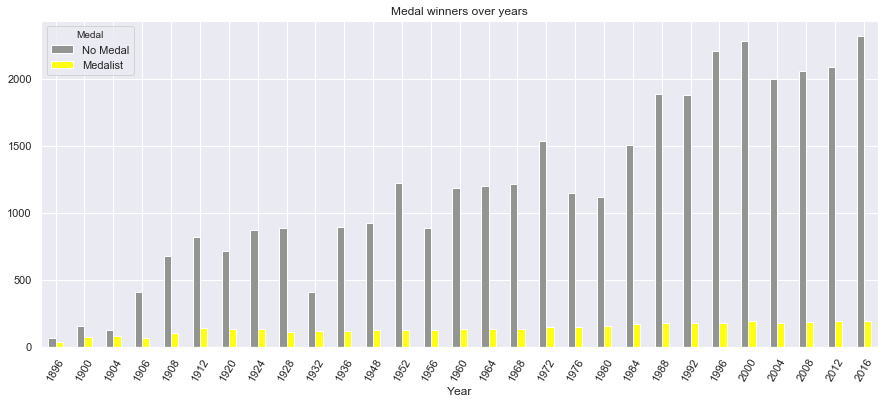

In [22]:
(medalOverYears.groupby(['Year','Medal'])['Medal'].count().unstack())[['No Medal','Medalist']].plot(kind='bar',color=['xkcd:grey','xkcd:yellow'],figsize=(15,6))
plt.title('Medal winners over years')
plt.xticks(rotation=60)

In [23]:
nonmedalist = medalOverYears[medalOverYears["Medal"] == "No Medal"]
medalist = medalOverYears[medalOverYears["Medal"] == "Medalist"]

In [24]:
print("Number of Non-Medalist :", len(nonmedalist))
print("Number of Medalist :", len(medalist))

Number of Non-Medalist : 34655
Number of Medalist : 3969


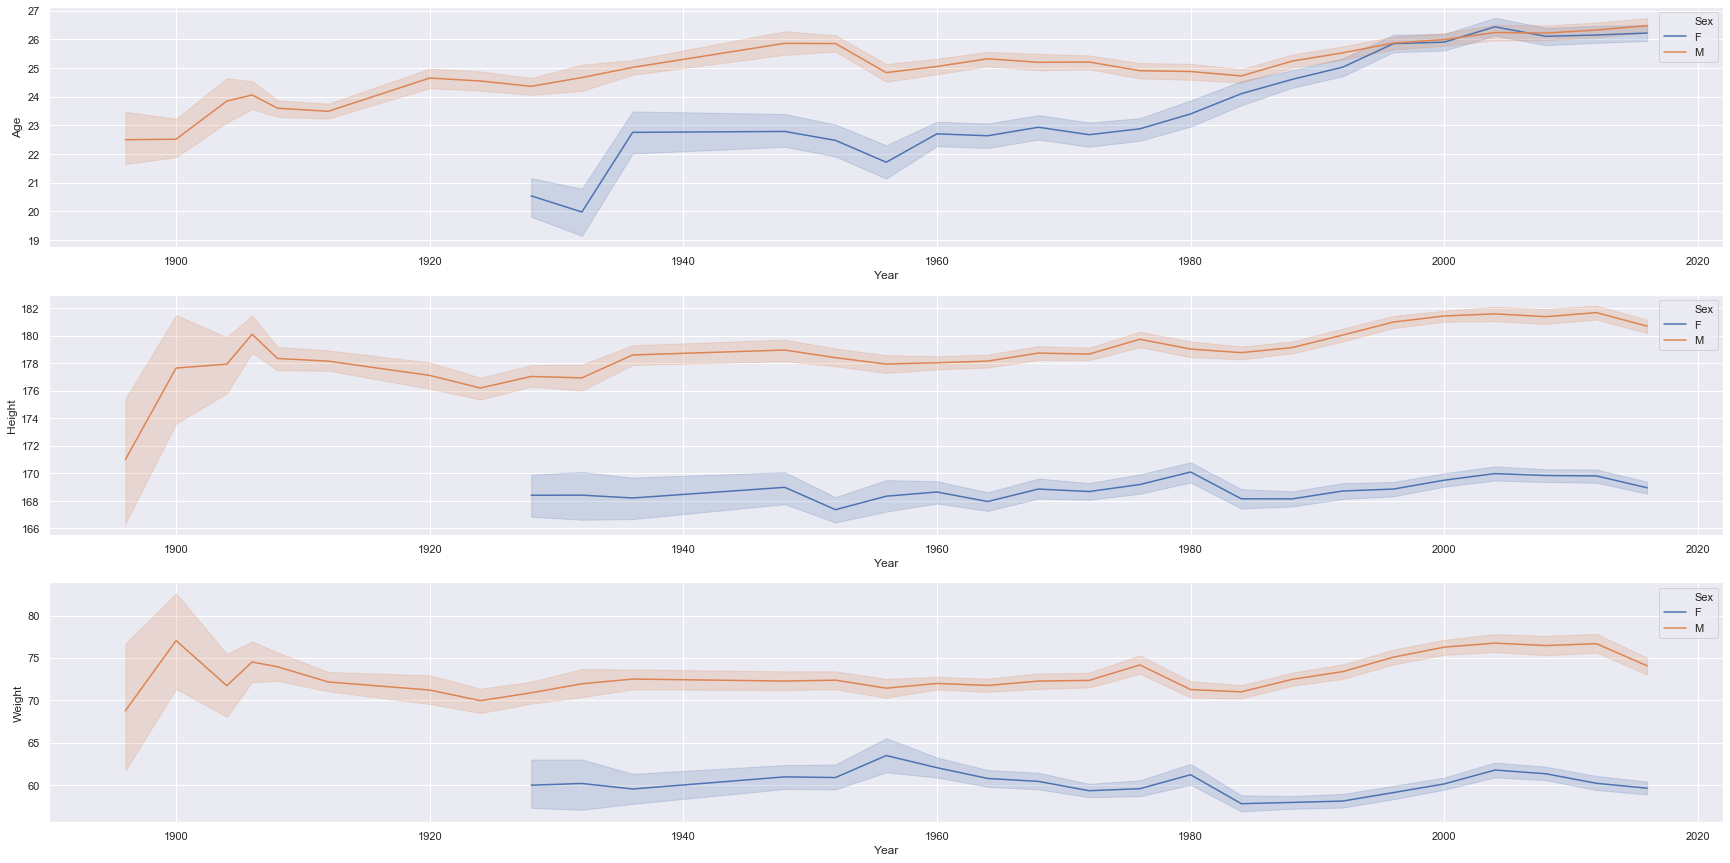

In [61]:
fig, axes = plt.subplots(3,1,figsize=(30, 15))
sb.lineplot(ax = axes[0], x='Year',y='Age',hue='Sex', data=nonmedalist)
sb.lineplot(ax = axes[1], x='Year',y='Height',hue='Sex', data=nonmedalist)
sb.lineplot(ax = axes[2], x='Year',y='Weight',hue='Sex', data=nonmedalist)

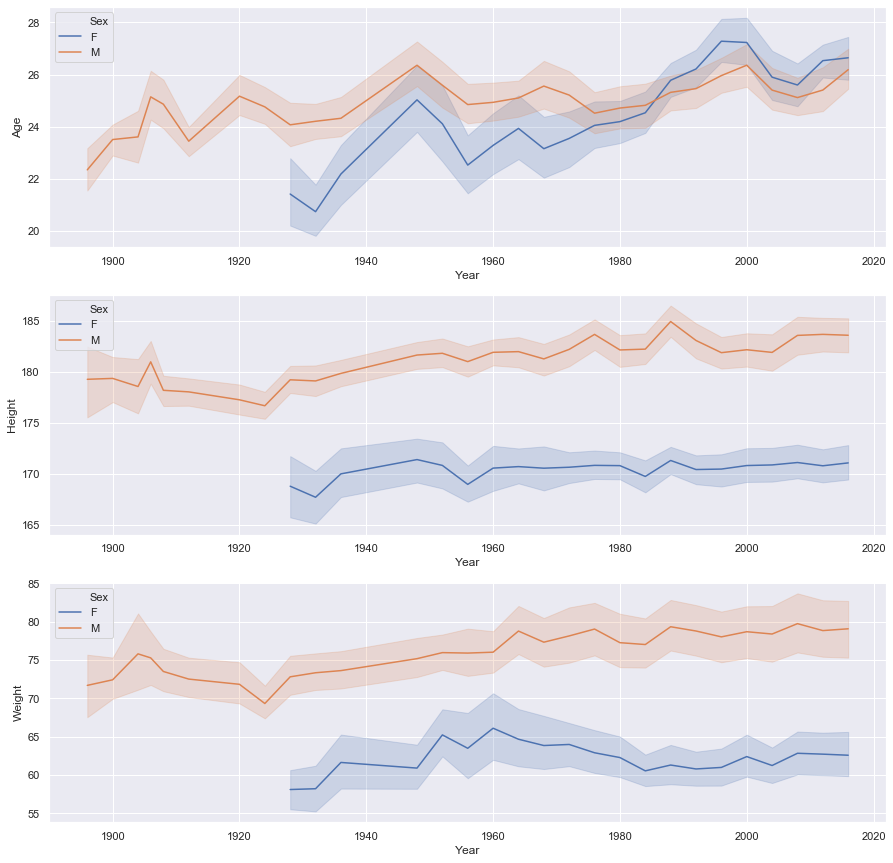

In [26]:
fig, axes = plt.subplots(3,1,figsize=(15, 15))
sb.lineplot(ax = axes[0], x='Year',y='Age',hue='Sex',data=medalist)
sb.lineplot(ax = axes[1], x='Year',y='Height',hue='Sex',data=medalist)
sb.lineplot(ax = axes[2], x='Year',y='Weight',hue='Sex',data=medalist)